Sample Dataset:
        Date Country  Confirmed  Deaths  Recovered  Active
0 2020-01-01  Brazil      20415     704      12705    7006
1 2020-01-02      UK      40415     575      31437    8403
2 2020-01-03   Italy      37719    3233       5582   28904
3 2020-01-04      UK      15843    4784      27105  -16046
4 2020-01-05      UK      46903    2633      22860   21410

Missing Values:
Date         0
Country      0
Confirmed    0
Deaths       0
Recovered    0
Active       0
dtype: int64

Duplicate Records: 0


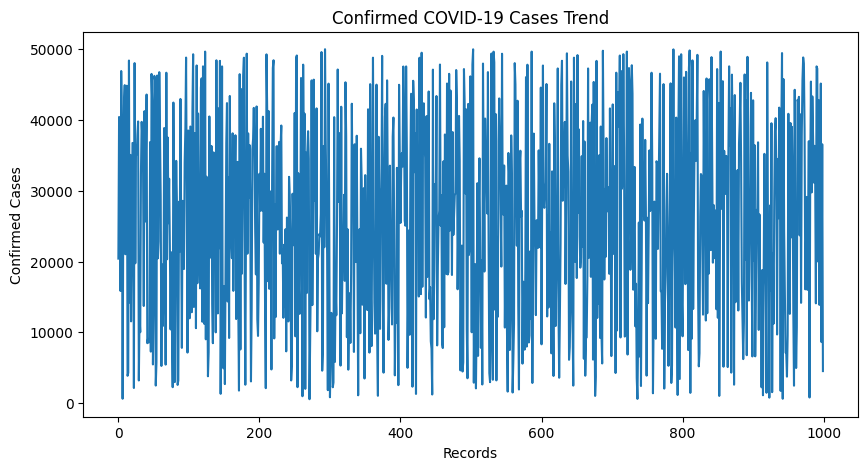

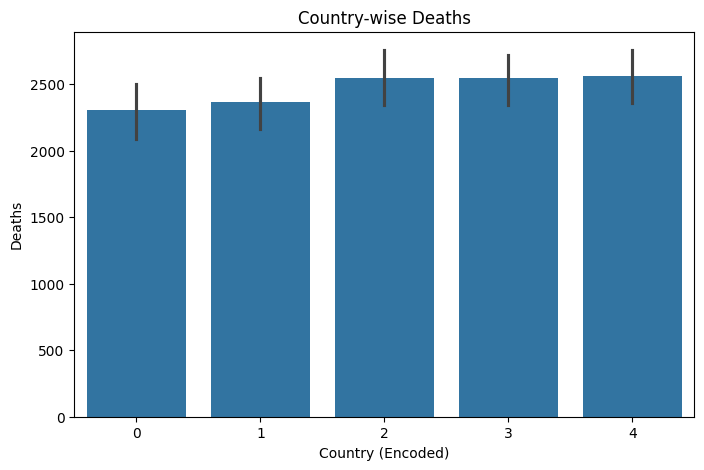

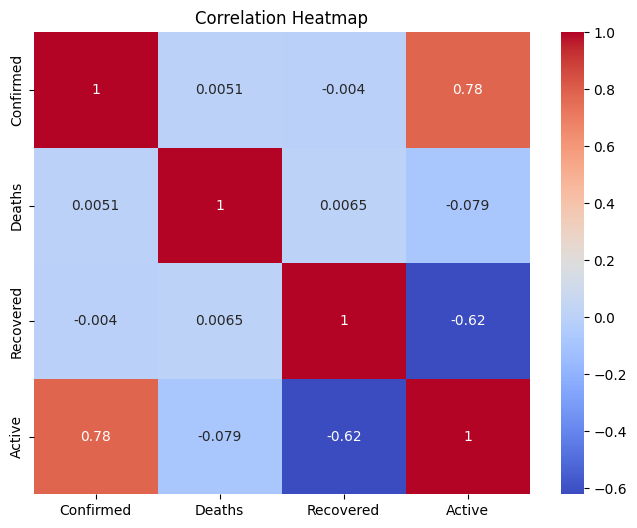


Model Evaluation Metrics:
MAE : 12549.694757044166
MSE : 210043765.1652623
R2 Score : 0.37062829326666413


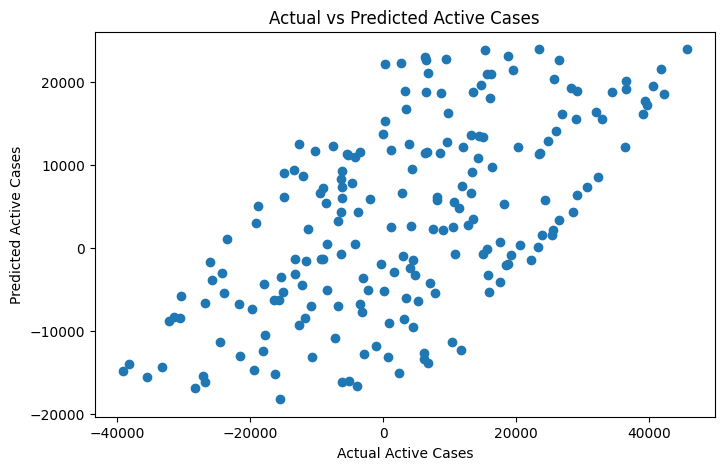


Dataset saved as 'covid19_data.csv'


In [1]:
# @title Default title text
# =====================================================
# COVID-19 Data Analysis & Visualization Project
# =====================================================

# -----------------------------
# 1. Import Required Libraries
# -----------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# -----------------------------
# 2. Dataset Creation (1000 Records)
# -----------------------------
np.random.seed(42)

data = {
    "Date": pd.date_range(start="2020-01-01", periods=1000),
    "Country": np.random.choice(["India", "USA", "Italy", "Brazil", "UK"], 1000),
    "Confirmed": np.random.randint(500, 50000, 1000),
    "Deaths": np.random.randint(1, 5000, 1000),
    "Recovered": np.random.randint(100, 40000, 1000)
}

df = pd.DataFrame(data)

# Calculate Active Cases
df["Active"] = df["Confirmed"] - (df["Deaths"] + df["Recovered"])

# Display sample data
print("Sample Dataset:")
print(df.head())

# -----------------------------
# 3. Data Preprocessing
# -----------------------------
# Check missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Check duplicates
print("\nDuplicate Records:", df.duplicated().sum())

# Encode Country column
le = LabelEncoder()
df["Country"] = le.fit_transform(df["Country"])

# -----------------------------
# 4. Exploratory Data Analysis (EDA)
# -----------------------------

# Trend of confirmed cases
plt.figure(figsize=(10,5))
plt.plot(df["Confirmed"])
plt.title("Confirmed COVID-19 Cases Trend")
plt.xlabel("Records")
plt.ylabel("Confirmed Cases")
plt.show()

# Country-wise deaths
plt.figure(figsize=(8,5))
sns.barplot(x=df["Country"], y=df["Deaths"])
plt.title("Country-wise Deaths")
plt.xlabel("Country (Encoded)")
plt.ylabel("Deaths")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[["Confirmed","Deaths","Recovered","Active"]].corr(),
            annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# -----------------------------
# 5. Feature Selection
# -----------------------------
X = df[["Deaths", "Recovered"]]
y = df["Active"]

# -----------------------------
# 6. Feature Scaling
# -----------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -----------------------------
# 7. Train-Test Split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# -----------------------------
# 8. Model Building
# -----------------------------
model = LinearRegression()
model.fit(X_train, y_train)

# -----------------------------
# 9. Model Evaluation
# -----------------------------
y_pred = model.predict(X_test)

print("\nModel Evaluation Metrics:")
print("MAE :", mean_absolute_error(y_test, y_pred))
print("MSE :", mean_squared_error(y_test, y_pred))
print("R2 Score :", r2_score(y_test, y_pred))

# -----------------------------
# 10. Residual Plot
# -----------------------------
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Active Cases")
plt.ylabel("Predicted Active Cases")
plt.title("Actual vs Predicted Active Cases")
plt.show()

# -----------------------------
# 11. Save Dataset
# -----------------------------
df.to_csv("covid19_data.csv", index=False)
print("\nDataset saved as 'covid19_data.csv'")


In [3]:
df.head(1000)

,Date,Country,Confirmed,Deaths,Recovered,Active
0,2020-01-01,0,20415,704,12705,7006
1,2020-01-02,3,40415,575,31437,8403
2,2020-01-03,2,37719,3233,5582,28904
3,2020-01-04,3,15843,4784,27105,-16046
4,2020-01-05,3,46903,2633,22860,21410
...,...,...,...,...,...,...
995,2022-09-22,4,27484,4698,18585,4201
996,2022-09-23,1,45133,341,13077,31715
997,2022-09-24,1,8625,3829,19974,-15178
998,2022-09-25,0,36559,1969,7774,26816
